In [4]:
import urllib.request

print('Beginning file download with urllib2...')

url = "https://raw.githubusercontent.com/bursteinalan/Data-Sets/master/Housing/House%20Prediction%20Data.csv"
urllib.request.urlretrieve(url, 'HousePrediction.csv')

Beginning file download with urllib2...


('HousePrediction.csv', <http.client.HTTPMessage at 0x7ffdb000c880>)

In [294]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools
from termcolor import colored as cl
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso 
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet 
from sklearn.metrics import explained_variance_score as evs


df = pd.read_csv('HousePrediction.csv')


for x in df.columns:
    if df[x].value_counts().iloc[0]>2000 or df[x].value_counts().count() < 6 or df[x].value_counts().sum() < 200:
        df = df.drop(columns = x)
    else:
        pass
df = df[df['SalePrice'].notna()]


# df2 = df[df.T[df.dtypes!=np.object].index]
# df3 = df.drop(columns = df[df.T[df.dtypes!=np.object].index].columns)


le = LabelEncoder()
df['Neighborhood2'] = le.fit_transform(df.Neighborhood)
df['HouseStyle2'] = le.fit_transform(df.HouseStyle)
df['Exterior1st2'] = le.fit_transform(df.Exterior1st)
df['Exterior1st2'] = le.fit_transform(df.Exterior1st)
df['Foundation2'] = le.fit_transform(df.Foundation)
df['BsmtFinType12'] = le.fit_transform(df.BsmtFinType1)
df['GarageType2'] = le.fit_transform(df.GarageType)

df =df[df.T[df.dtypes!=np.object].index]
df


df = df.fillna(0)

df.isnull().sum()


    
pd.set_option("display.max_columns", None)

df


/var/folders/q4/qhhxpt_d3pzbqqvftwz85mk00000gn/T/ipykernel_961/3279730669.py:43: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df =df[df.T[df.dtypes!=np.object].index]


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,Neighborhood2,HouseStyle2,Exterior1st2,Foundation2,BsmtFinType12,GarageType2
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,150.0,856.0,856,854,1710,3,8,2003.0,2.0,548.0,0,61,2,208500.0,5,5,12,2,2,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,284.0,1262.0,1262,0,1262,3,6,1976.0,2.0,460.0,298,0,5,181500.0,24,2,8,1,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,434.0,920.0,920,866,1786,3,6,2001.0,2.0,608.0,0,42,9,223500.0,5,5,12,2,2,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,540.0,756.0,961,756,1717,3,7,1998.0,3.0,642.0,0,35,2,140000.0,6,5,13,0,0,5
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,490.0,1145.0,1145,1053,2198,4,9,2000.0,3.0,836.0,192,84,12,250000.0,15,5,12,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0.0,953.0,953.0,953,694,1647,3,7,1999.0,2.0,460.0,0,40,8,175000.0,8,5,12,2,5,1
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790.0,589.0,1542.0,2073,0,2073,3,7,1978.0,2.0,500.0,349,0,2,210000.0,14,2,9,1,0,1
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275.0,877.0,1152.0,1188,1152,2340,4,9,1941.0,1.0,252.0,0,60,5,266500.0,6,5,5,4,2,1
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49.0,0.0,1078.0,1078,0,1078,2,5,1950.0,1.0,240.0,366,0,4,142125.0,12,2,8,1,2,1


In [295]:
correl = df.corr()
Corr_with_price = correl['SalePrice']
sorted_correl = correl.sort_values(by = ['SalePrice'])
sorted_correl['SalePrice']

GarageType2     -0.415283
BsmtFinType12   -0.103114
MSSubClass      -0.084284
OverallCond     -0.077856
Id              -0.021917
MoSold           0.046432
Exterior1st2     0.103551
BedroomAbvGr     0.168213
HouseStyle2      0.180163
LotFrontage      0.209624
Neighborhood2    0.210851
BsmtUnfSF        0.214479
GarageYrBlt      0.261366
LotArea          0.263843
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
Foundation2      0.382479
BsmtFinSF1       0.386420
MasVnrArea       0.472614
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [296]:
# Dublicating dataframe only with columns, which have high correlation with SalePrice

correl = df.corr()
Corr_with_price = correl['SalePrice']
sorted_correl = correl.sort_values(by = ['SalePrice'])
df4 = sorted_correl['SalePrice'].reset_index()
df4 = df4.loc[(df4['SalePrice']>0.3) | (df4['SalePrice']< -0.4)]
high_corr = list(df4['index'].values)
df5= df[high_corr]
df5



,GarageType2,OpenPorchSF,2ndFlrSF,WoodDeckSF,Foundation2,BsmtFinSF1,MasVnrArea,YearRemodAdd,YearBuilt,TotRmsAbvGrd,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
0,1,61,854,0,2,706.0,196.0,2003,2003,8,856,856.0,548.0,2.0,1710,7,208500.0
1,1,0,0,298,1,978.0,0.0,1976,1976,6,1262,1262.0,460.0,2.0,1262,6,181500.0
2,1,42,866,0,2,486.0,162.0,2002,2001,6,920,920.0,608.0,2.0,1786,7,223500.0
3,5,35,756,0,0,216.0,0.0,1970,1915,7,961,756.0,642.0,3.0,1717,7,140000.0
4,1,84,1053,192,2,655.0,350.0,2000,2000,9,1145,1145.0,836.0,3.0,2198,8,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,40,694,0,2,0.0,0.0,2000,1999,7,953,953.0,460.0,2.0,1647,6,175000.0
1456,1,0,0,349,1,790.0,119.0,1988,1978,7,2073,1542.0,500.0,2.0,2073,6,210000.0
1457,1,60,1152,0,4,275.0,0.0,2006,1941,9,1188,1152.0,252.0,1.0,2340,7,266500.0
1458,1,0,0,366,1,49.0,0.0,1996,1950,5,1078,1078.0,240.0,1.0,1078,5,142125.0


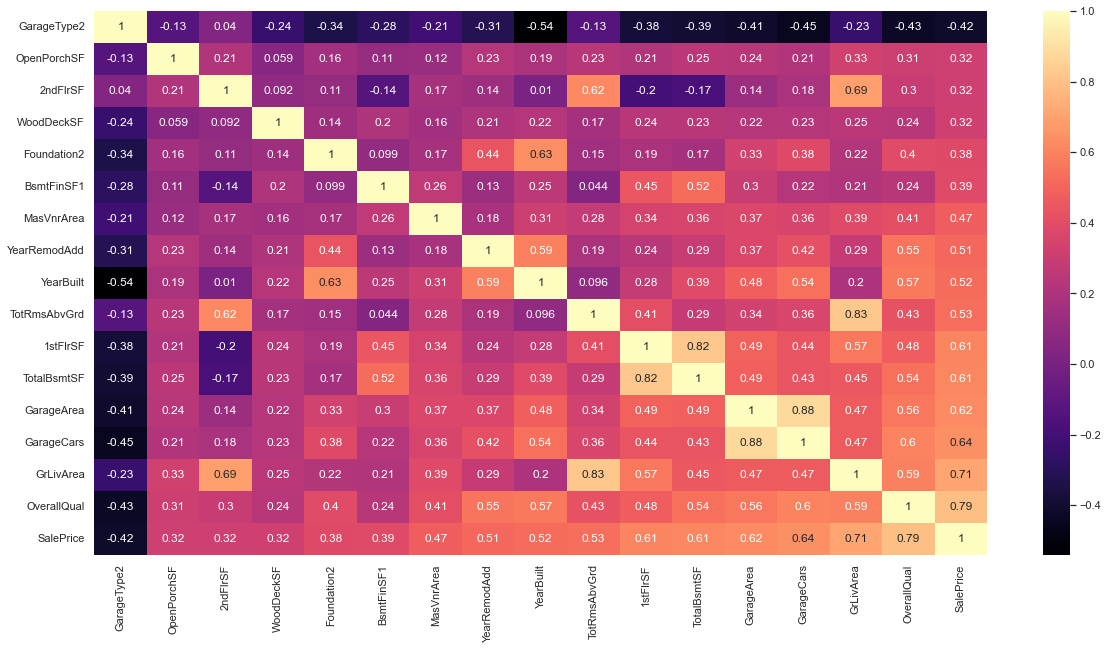

In [297]:
# Plotting heatmap to see highest correlations between columns

sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(df5.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

In [298]:
pd.set_option("display.max_columns", None)
df5


,GarageType2,OpenPorchSF,2ndFlrSF,WoodDeckSF,Foundation2,BsmtFinSF1,MasVnrArea,YearRemodAdd,YearBuilt,TotRmsAbvGrd,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
0,1,61,854,0,2,706.0,196.0,2003,2003,8,856,856.0,548.0,2.0,1710,7,208500.0
1,1,0,0,298,1,978.0,0.0,1976,1976,6,1262,1262.0,460.0,2.0,1262,6,181500.0
2,1,42,866,0,2,486.0,162.0,2002,2001,6,920,920.0,608.0,2.0,1786,7,223500.0
3,5,35,756,0,0,216.0,0.0,1970,1915,7,961,756.0,642.0,3.0,1717,7,140000.0
4,1,84,1053,192,2,655.0,350.0,2000,2000,9,1145,1145.0,836.0,3.0,2198,8,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,40,694,0,2,0.0,0.0,2000,1999,7,953,953.0,460.0,2.0,1647,6,175000.0
1456,1,0,0,349,1,790.0,119.0,1988,1978,7,2073,1542.0,500.0,2.0,2073,6,210000.0
1457,1,60,1152,0,4,275.0,0.0,2006,1941,9,1188,1152.0,252.0,1.0,2340,7,266500.0
1458,1,0,0,366,1,49.0,0.0,1996,1950,5,1078,1078.0,240.0,1.0,1078,5,142125.0


/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


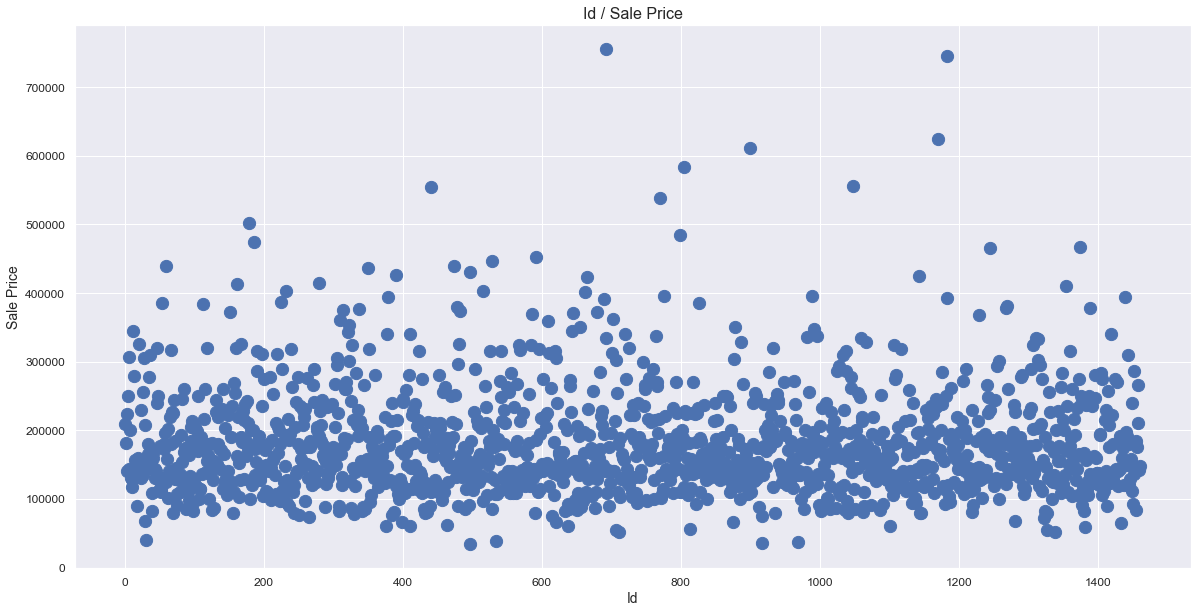

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


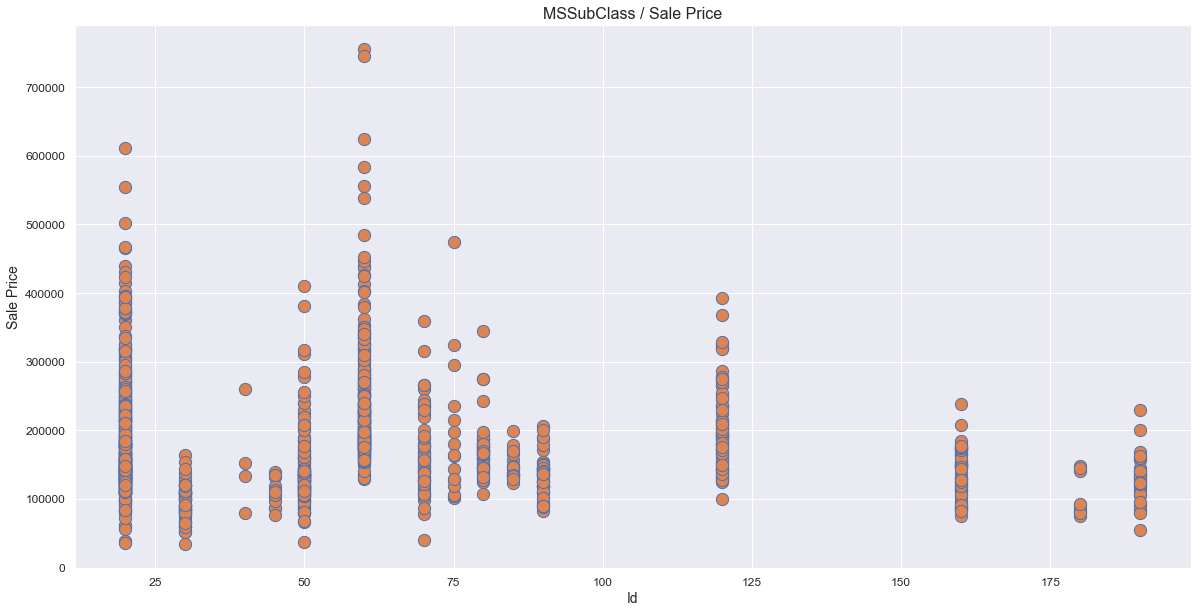

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


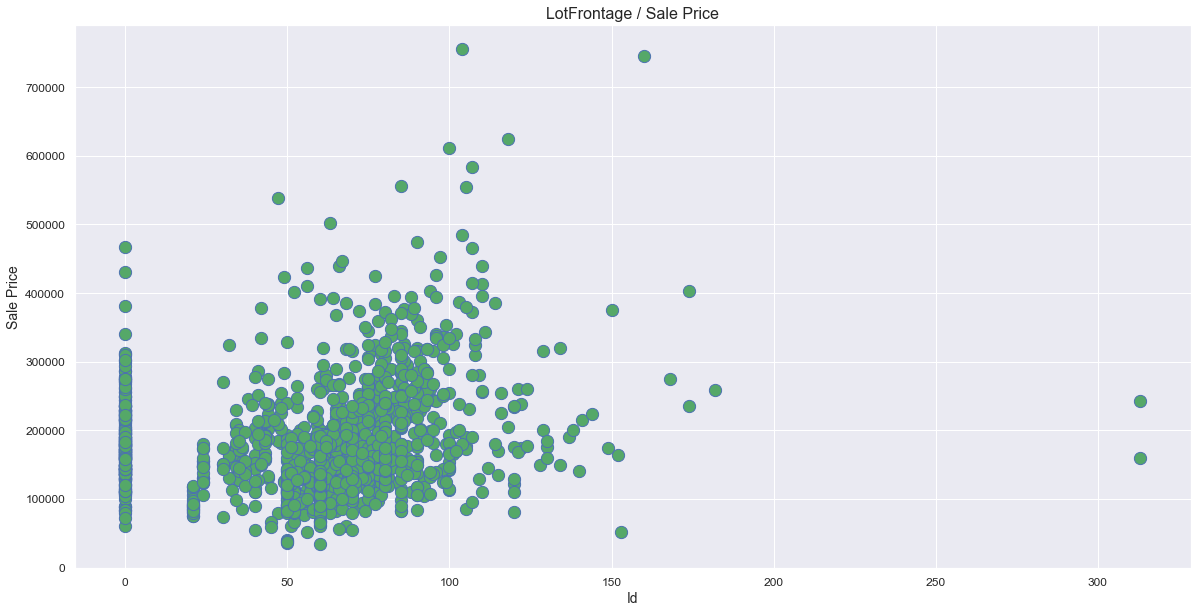

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


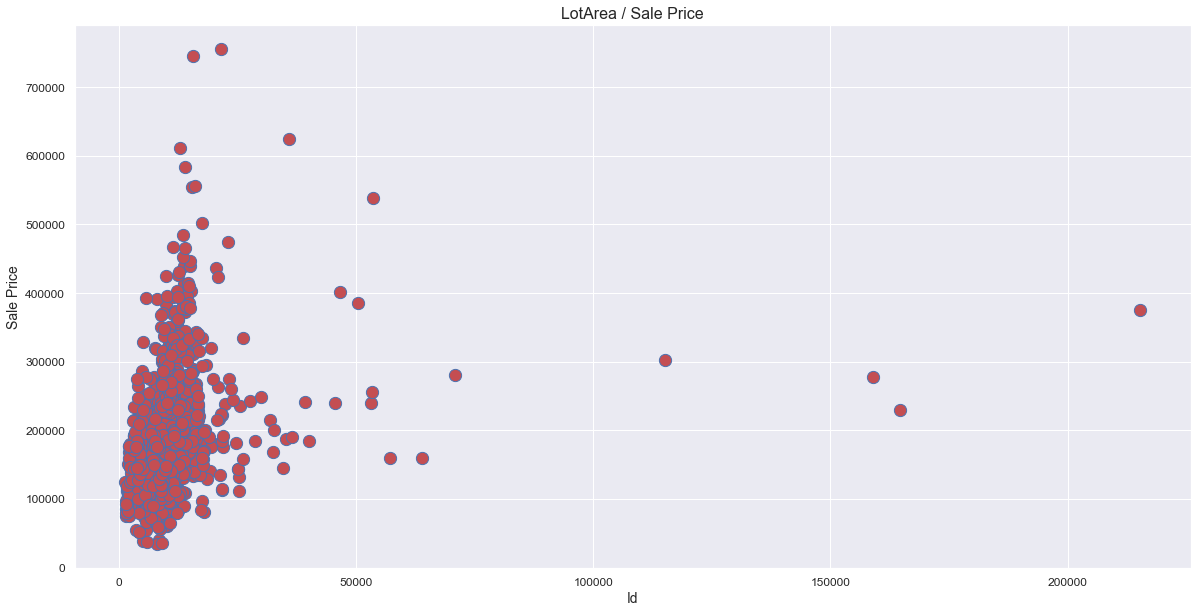

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


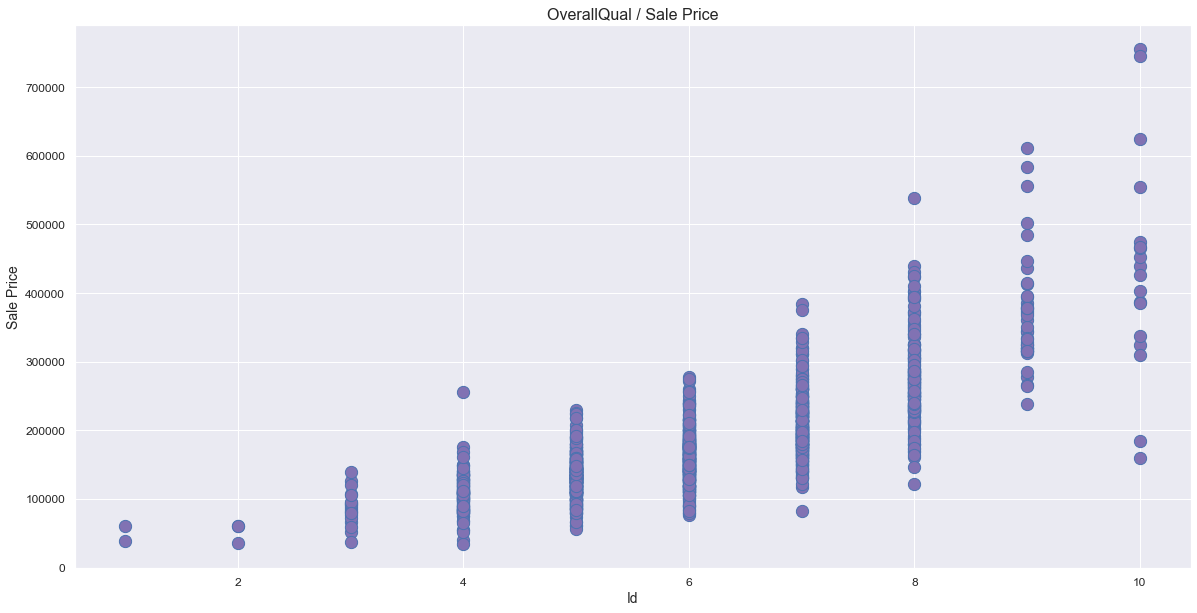

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


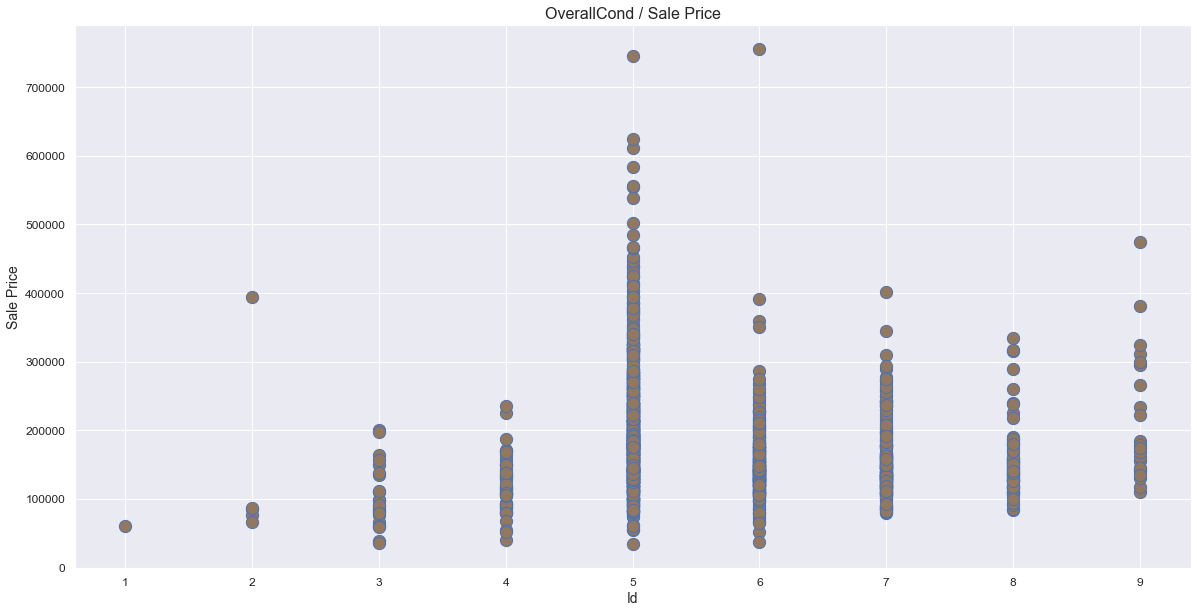

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


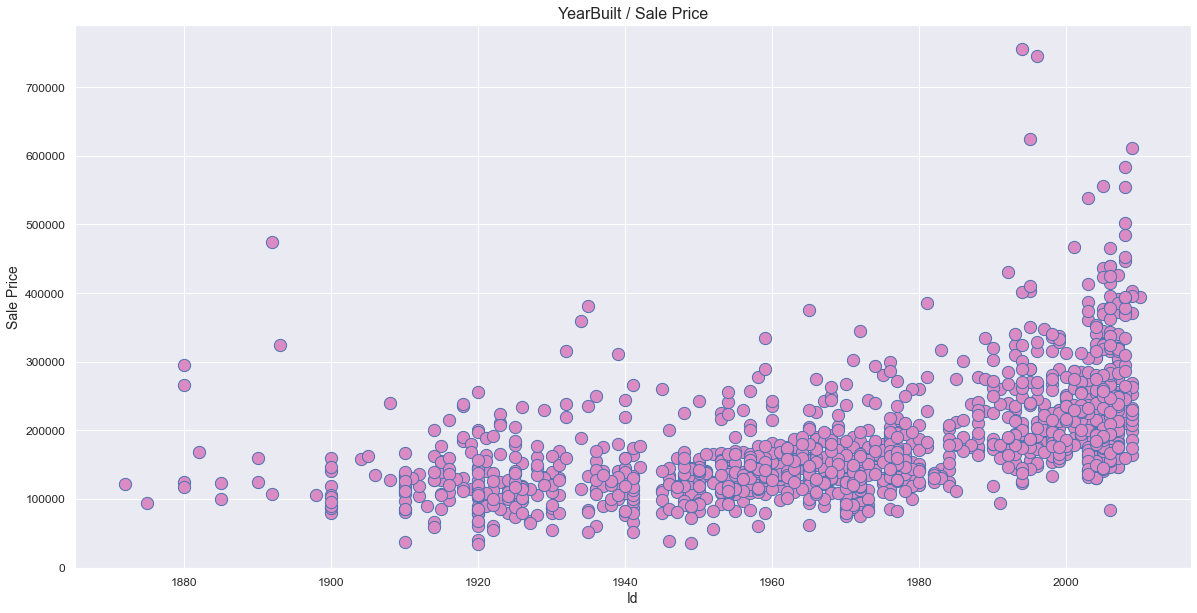

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


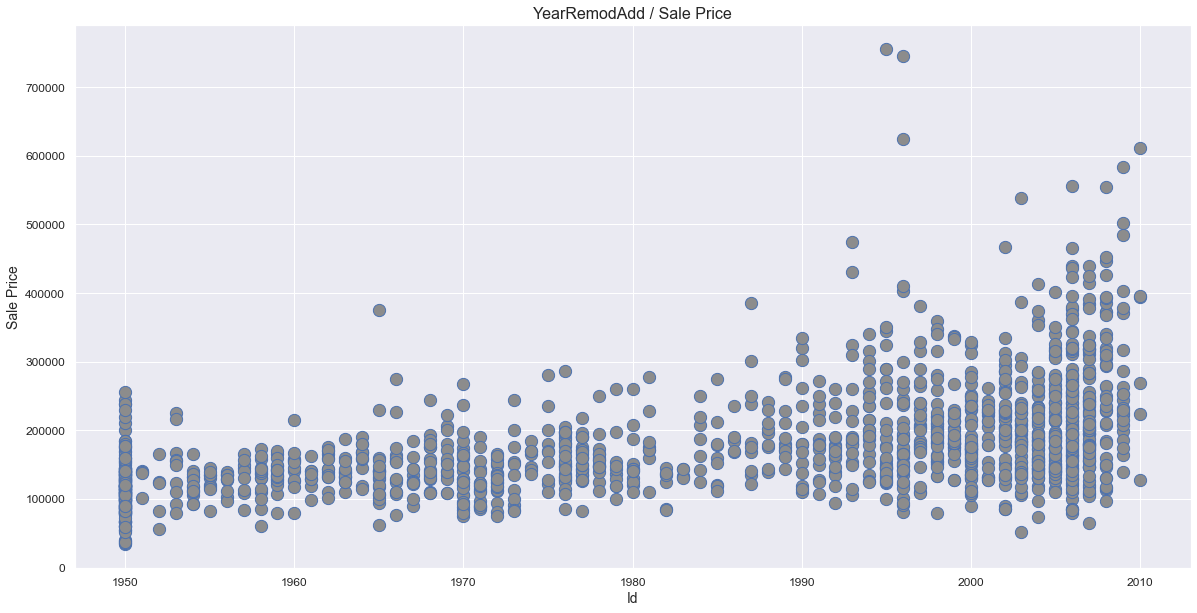

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


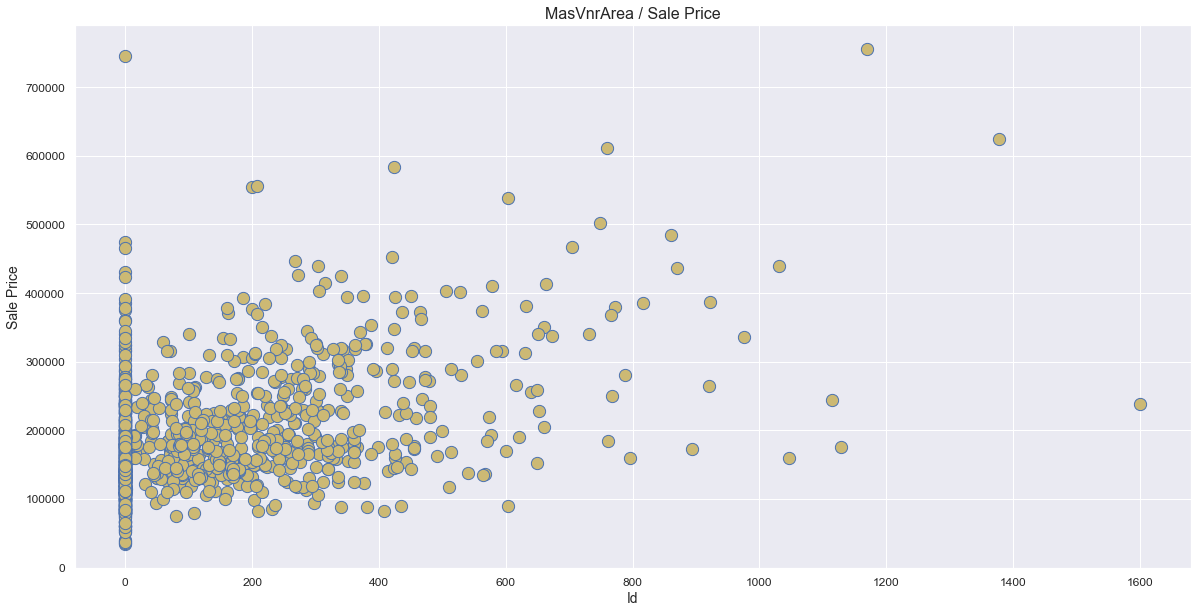

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


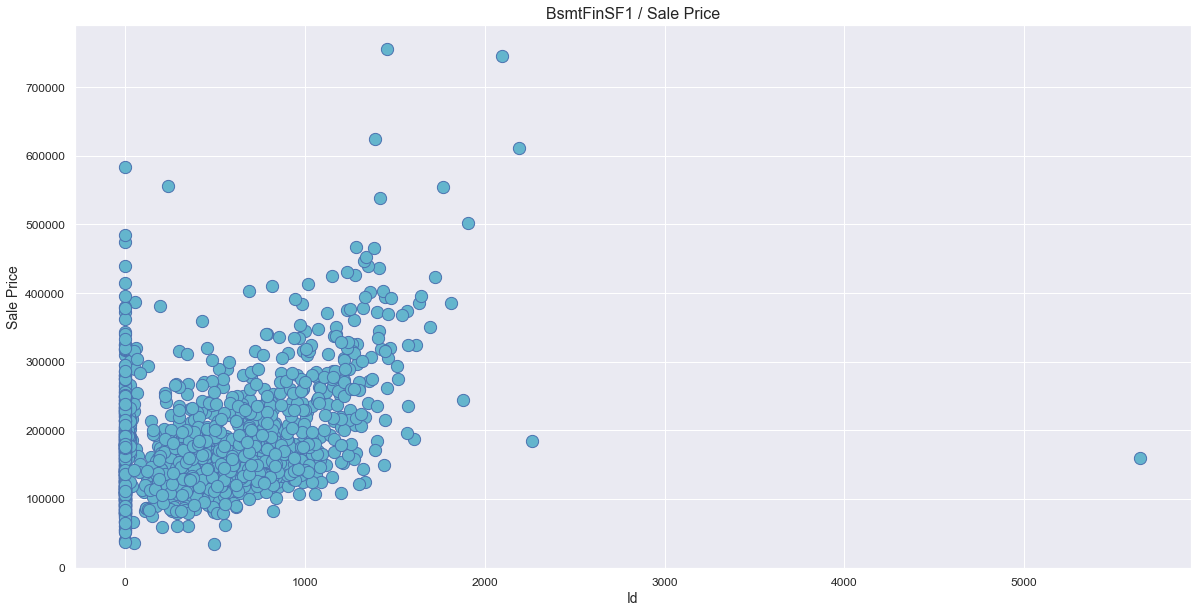

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


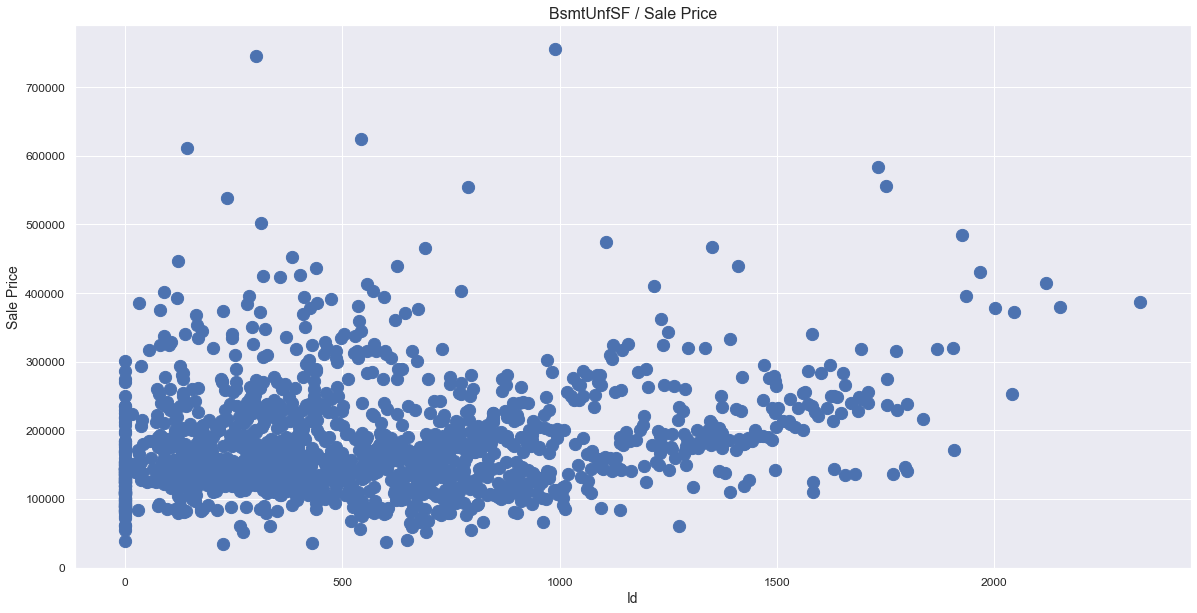

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


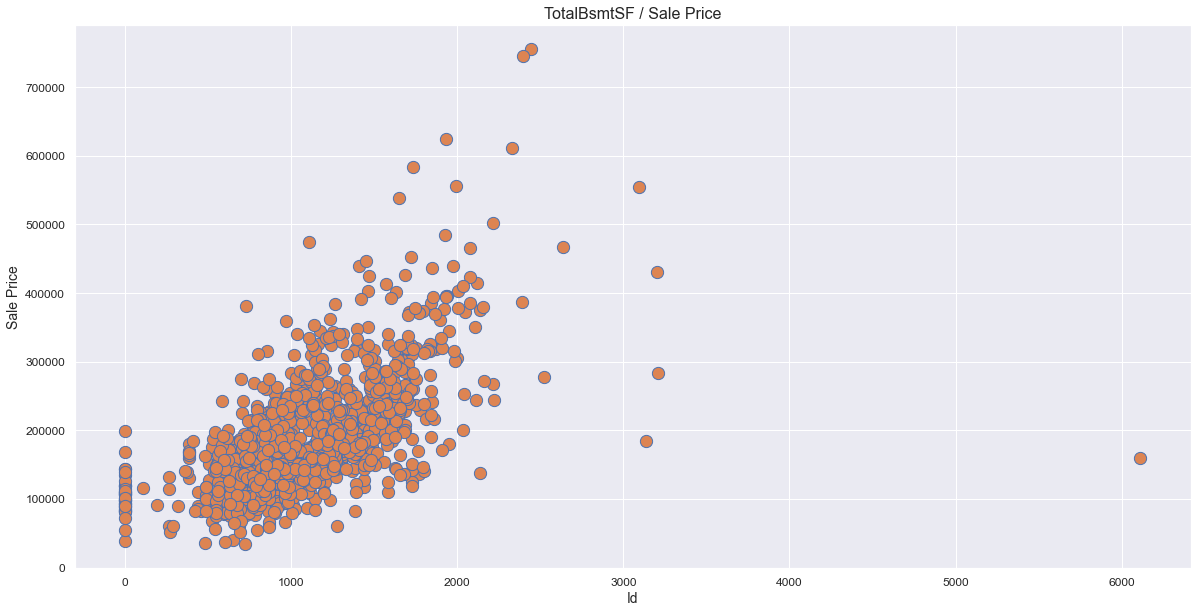

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


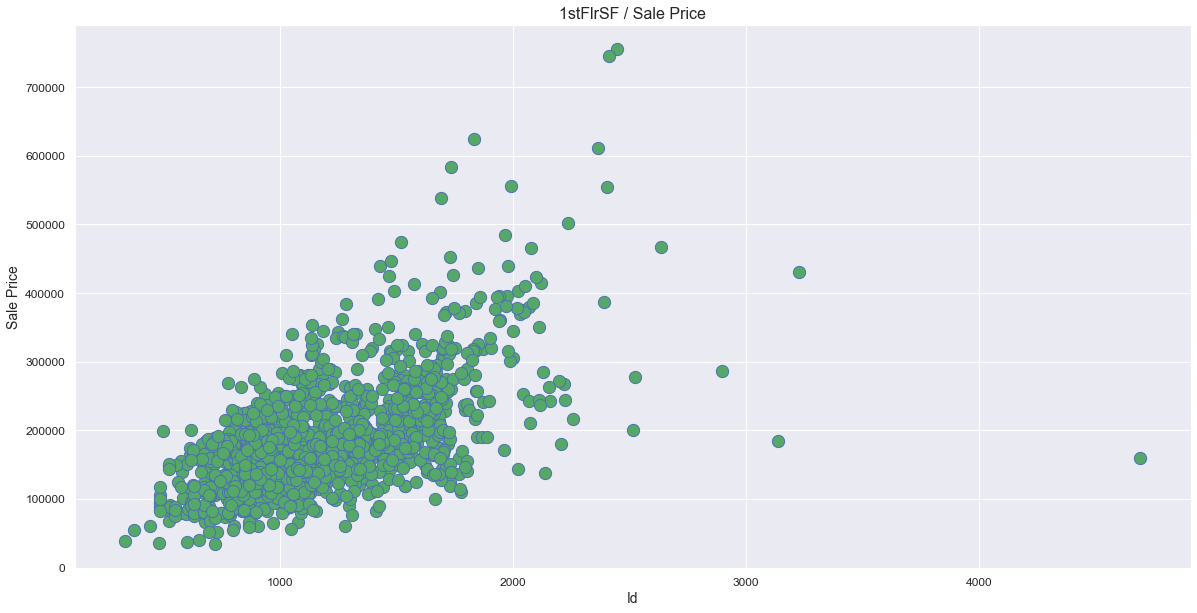

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


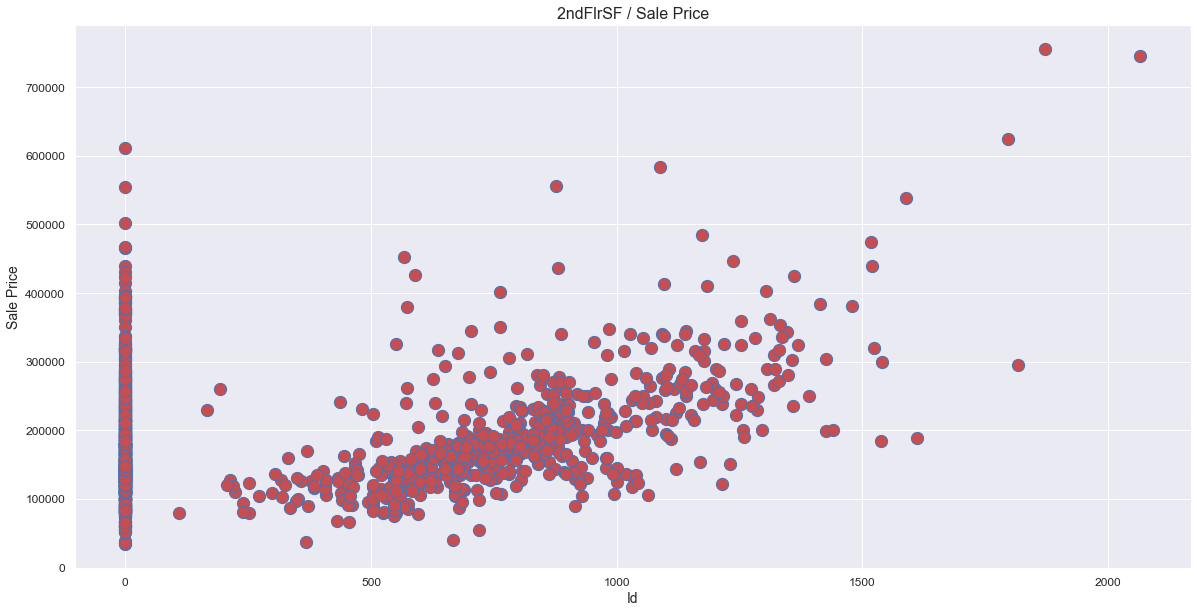

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


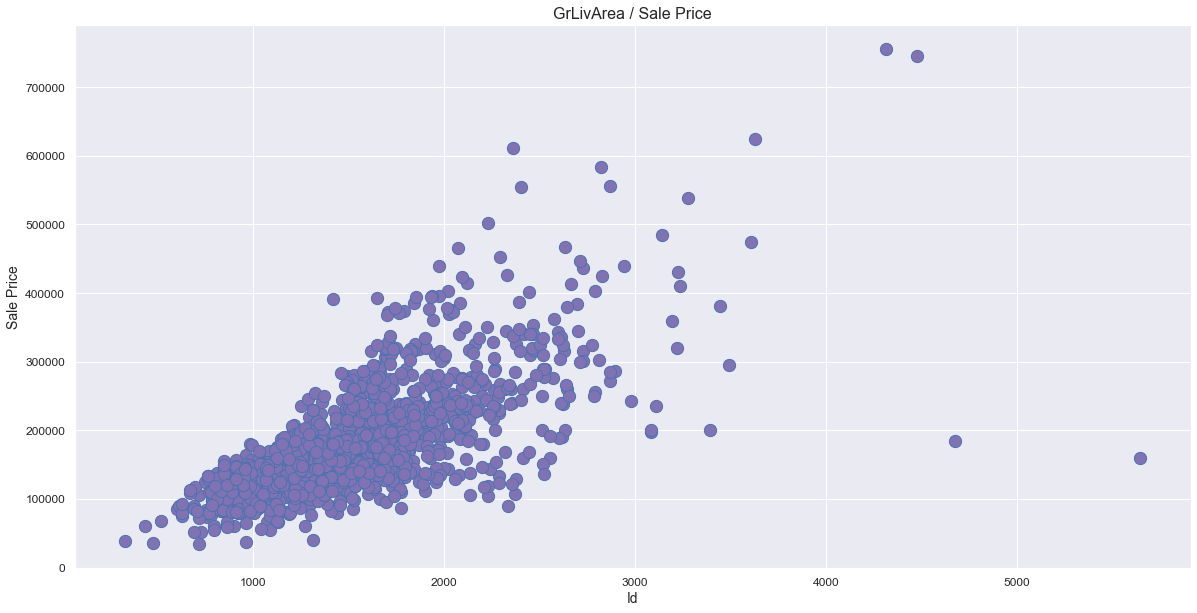

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


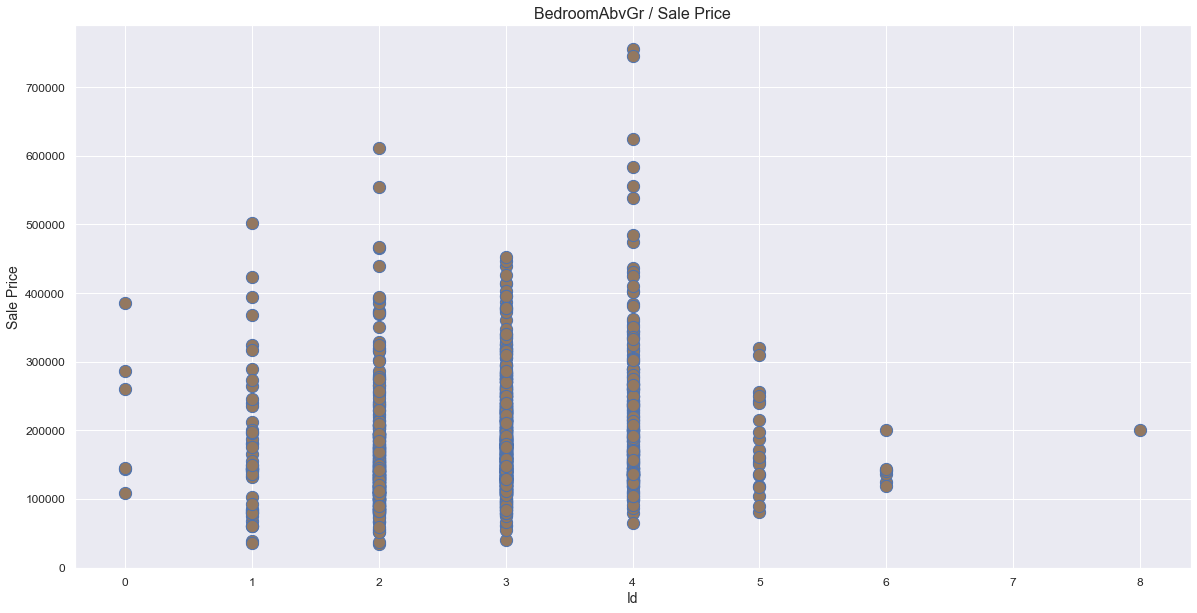

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


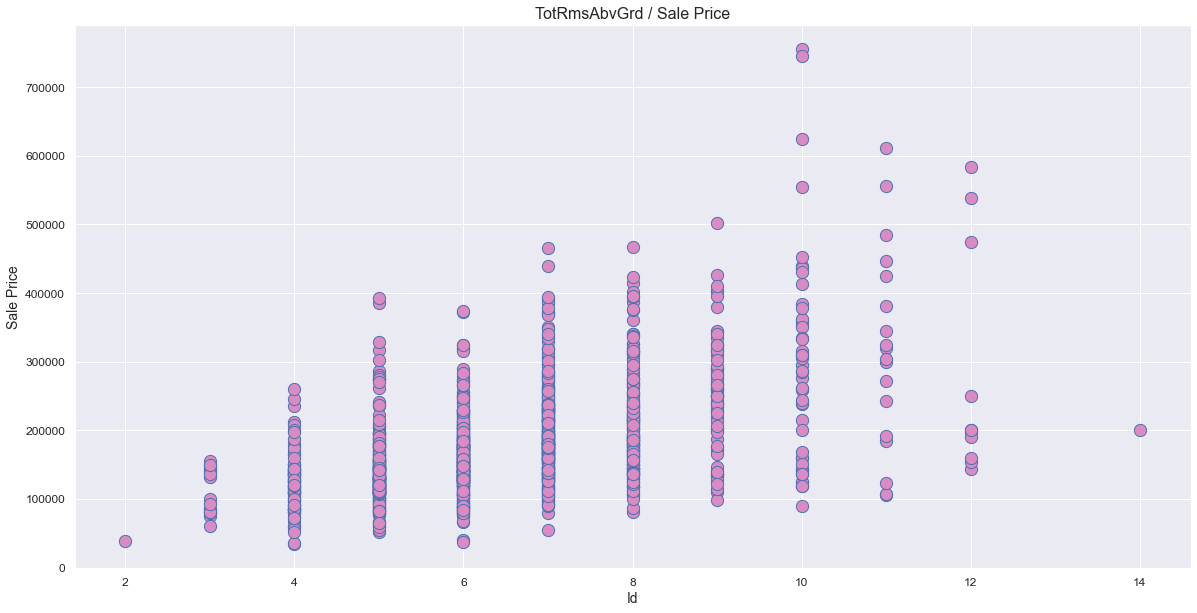

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


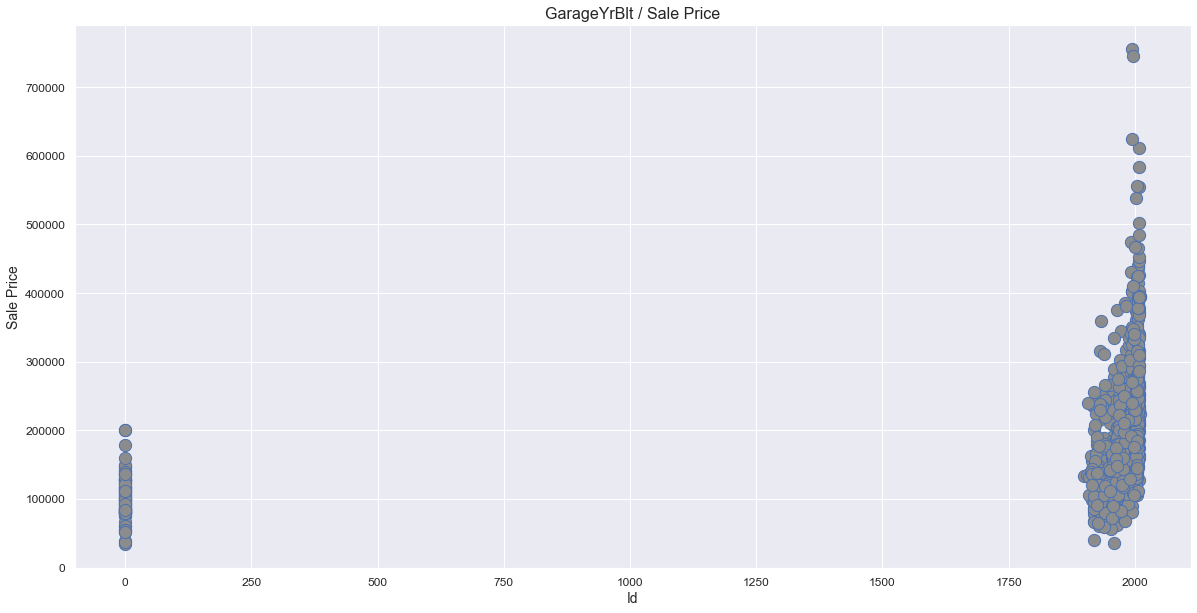

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


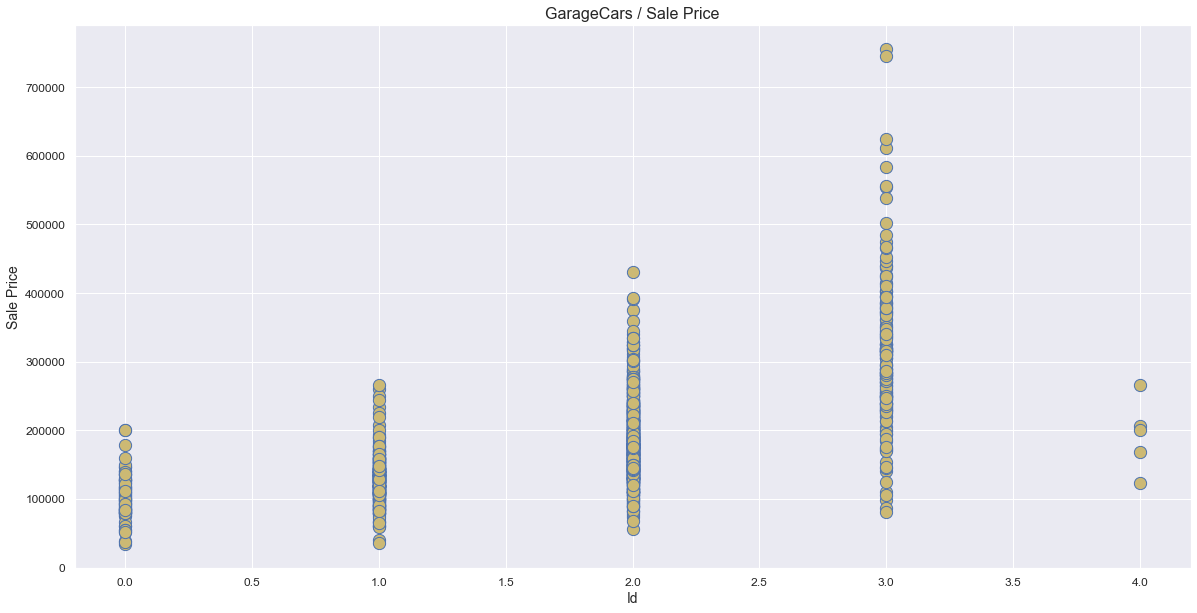

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


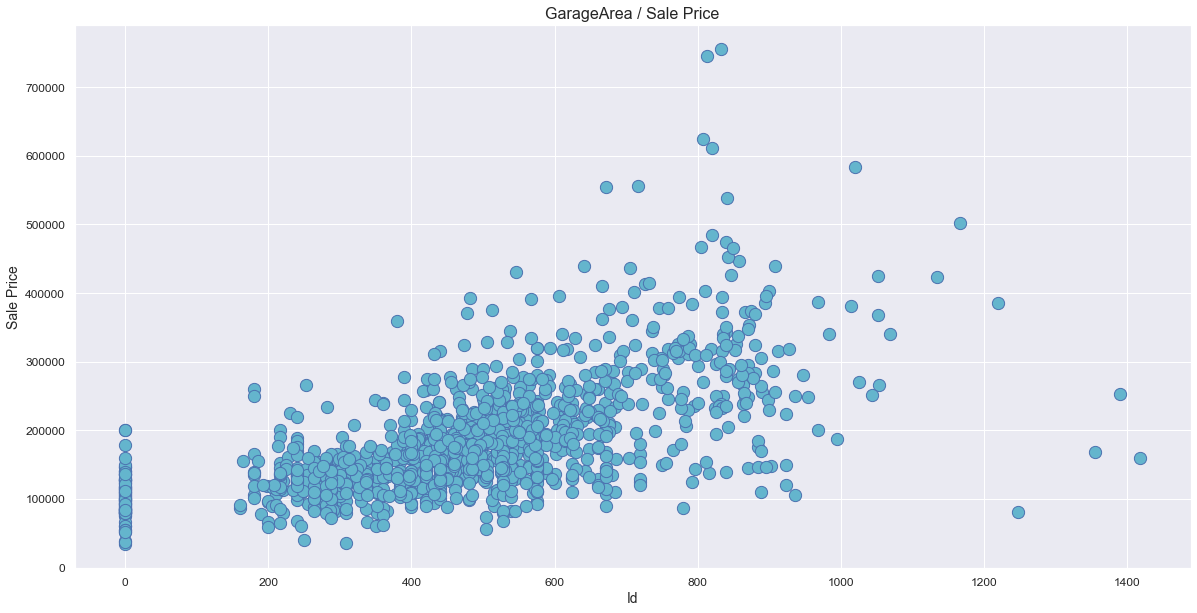

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


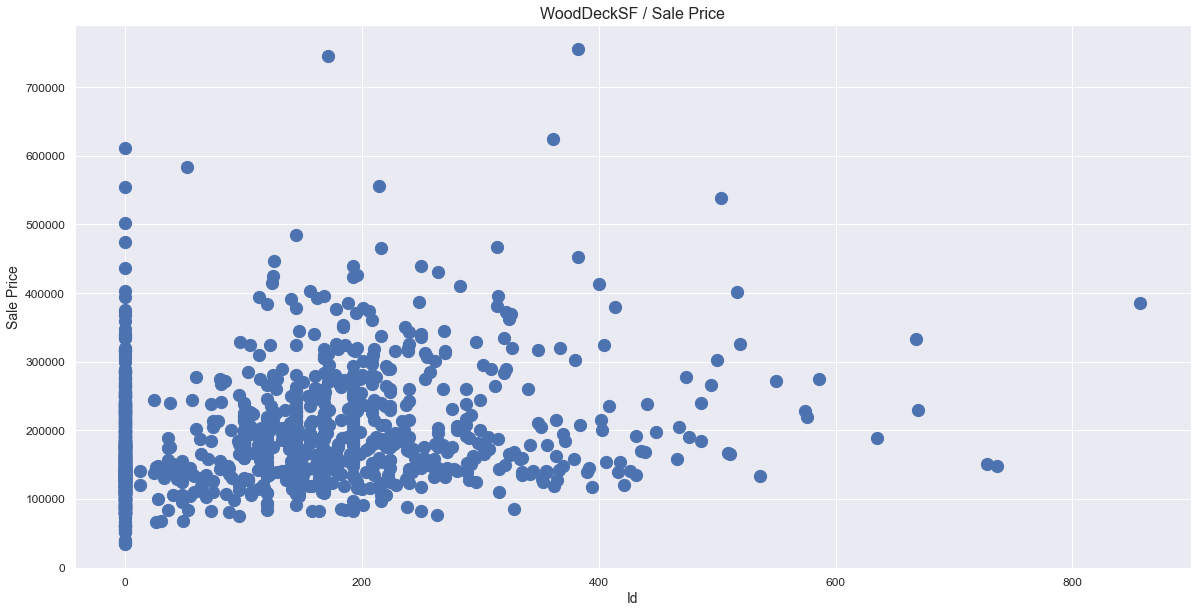

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


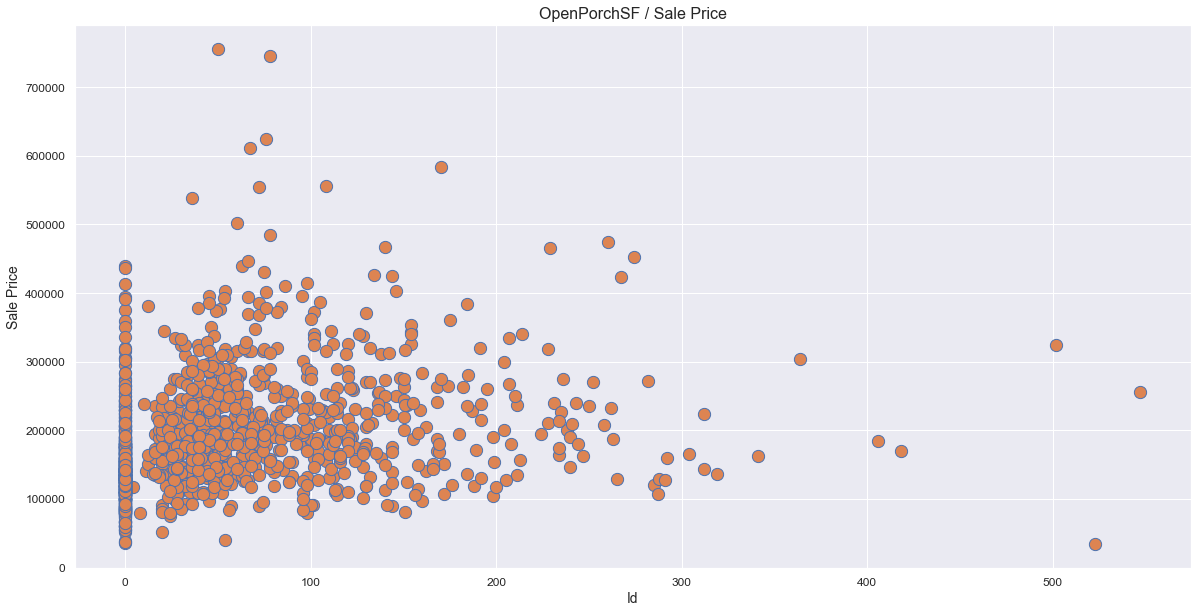

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


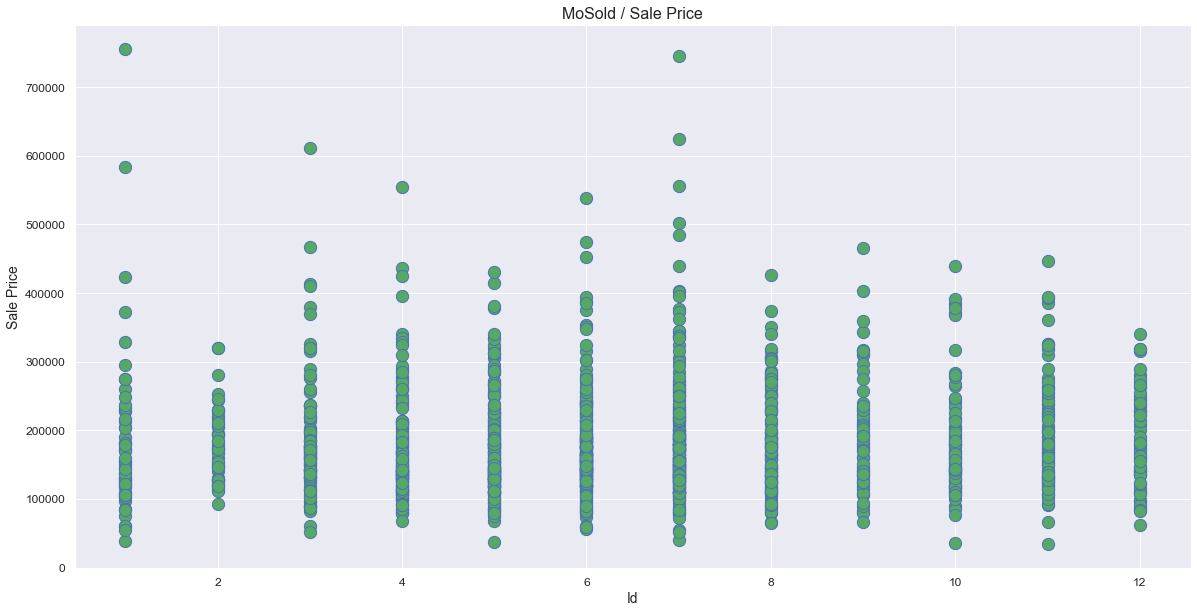

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


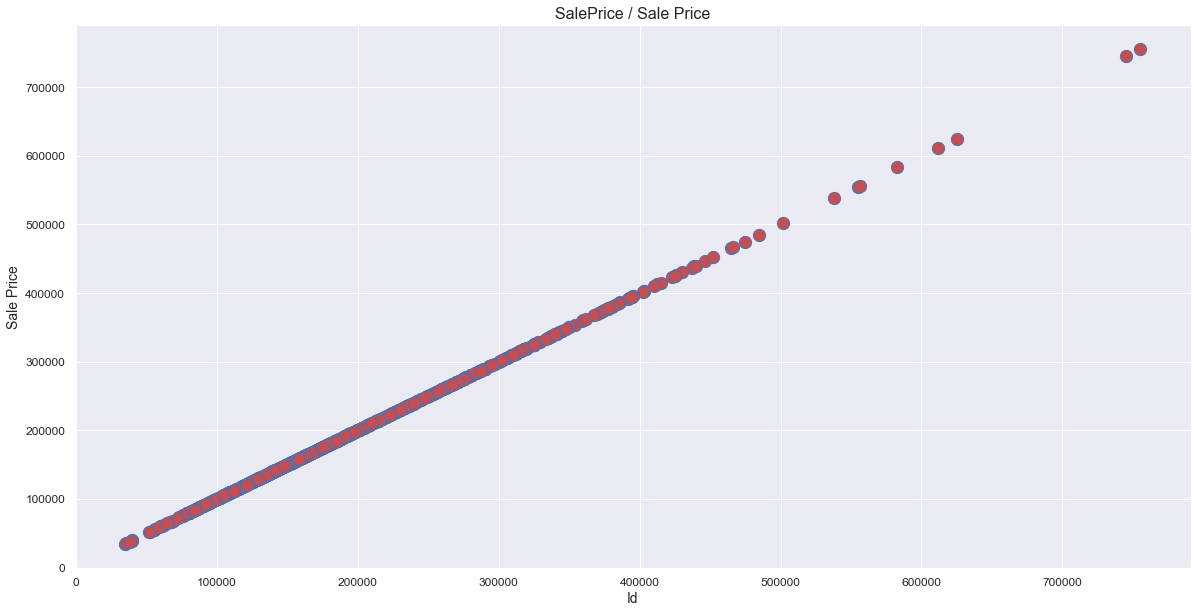

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


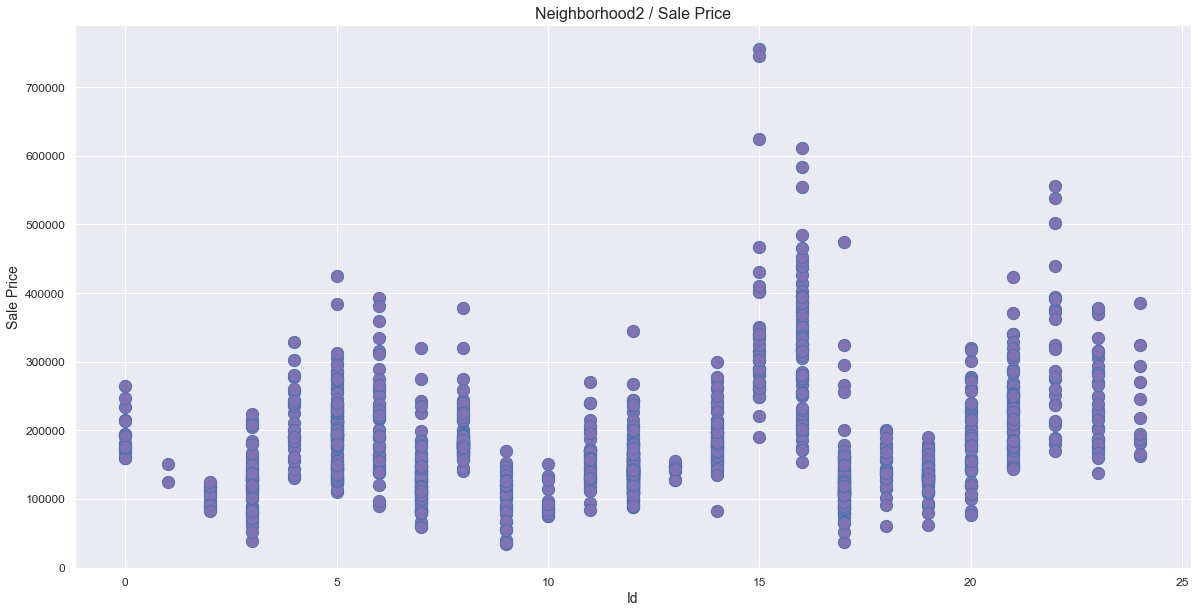

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


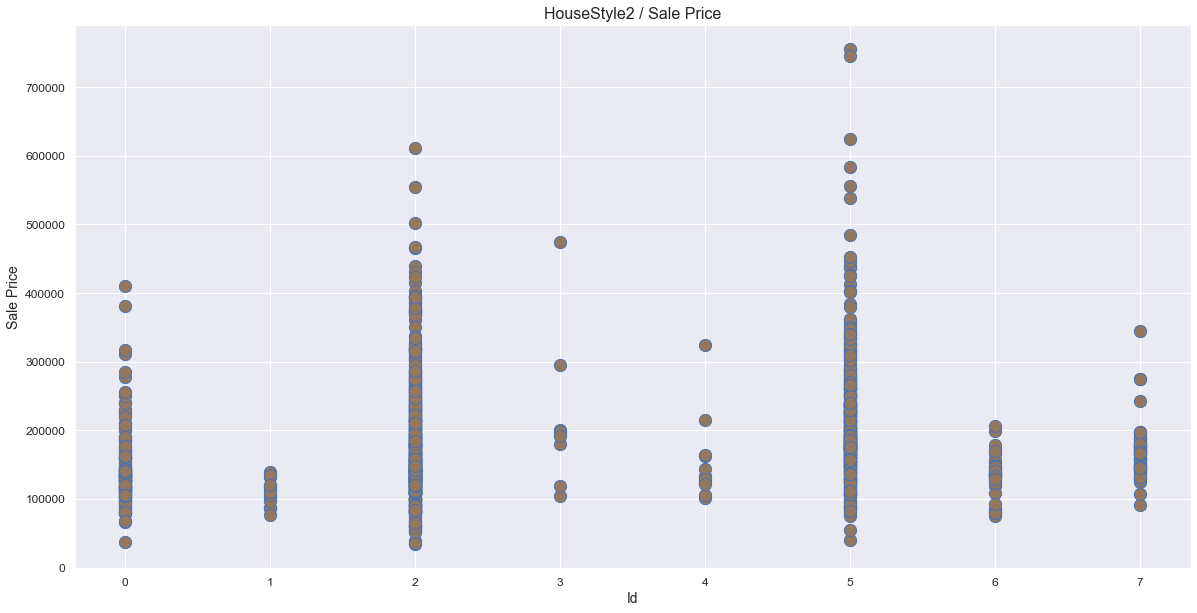

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


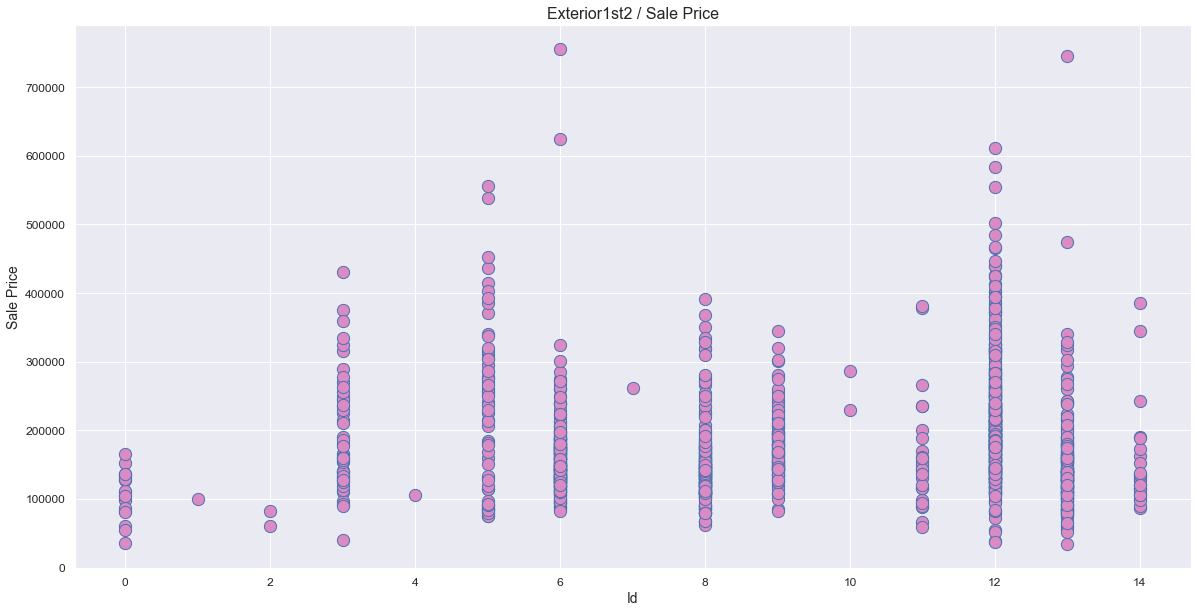

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


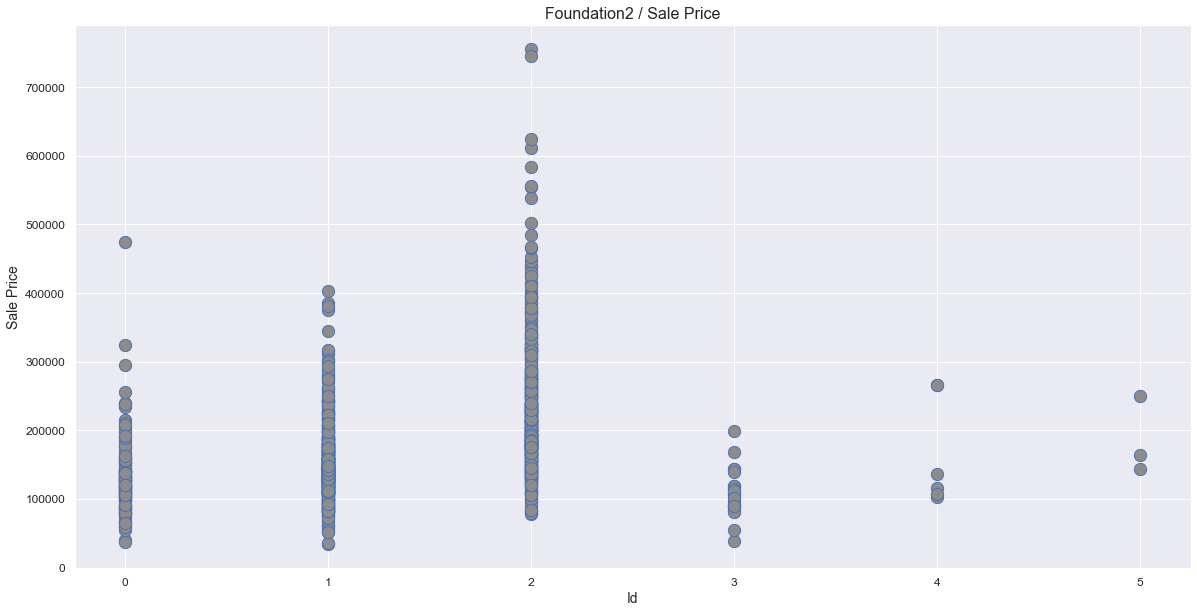

/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


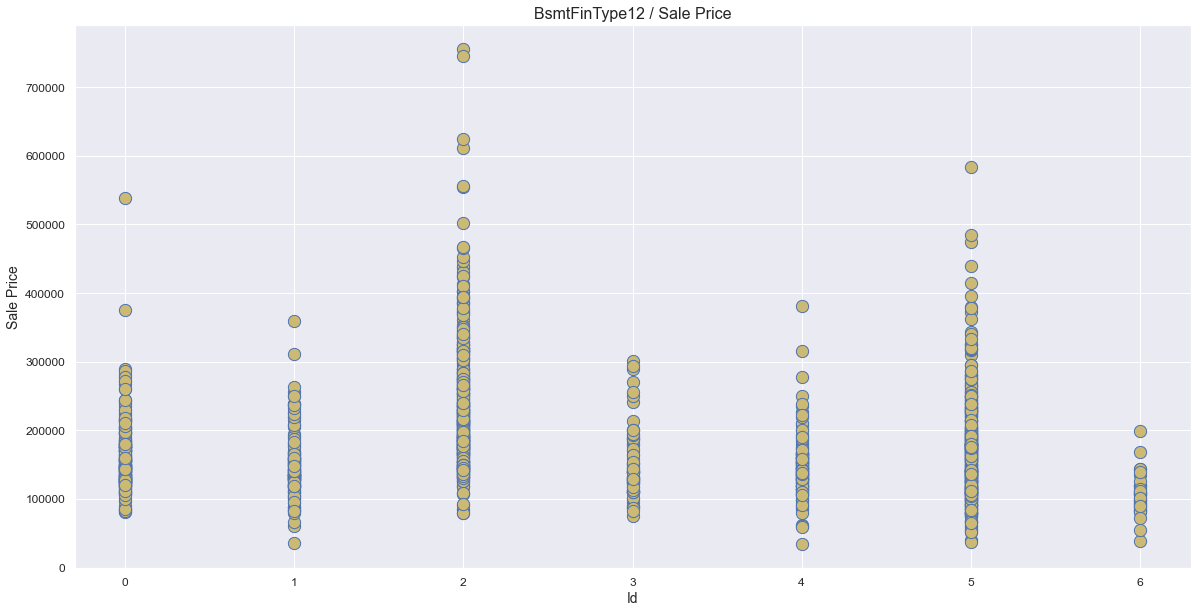

In [299]:
def scattering(y_var):
    scatter_df = df.drop(y_var, axis = 1)
    i = df.columns
    colors = itertools.cycle(sns.color_palette())
    for x in range(len(df.columns)-1):
        plot1 = sns.scatterplot(i[x], y_var, data = df, color = next(colors), edgecolor = 'b', s = 150)
        plt.title('{} / Sale Price'.format(i[x]), fontsize = 16)
        plt.xlabel('{}'.format(i[0]), fontsize = 14)
        plt.ylabel('Sale Price', fontsize = 14)
        plt.xticks(fontsize = 12)
        plt.yticks(fontsize = 12)
        plt.show()
    
scattering('SalePrice')

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

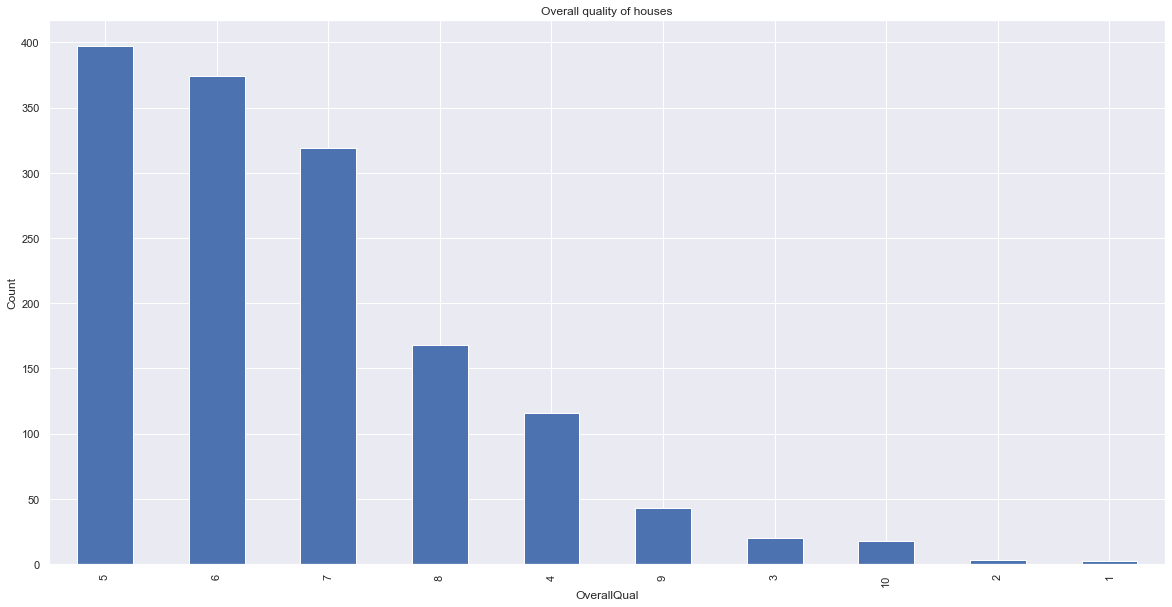

In [300]:
# Number of houses for each quality level

df['OverallQual'].value_counts().plot(kind= 'bar')
plt.title('Overall quality of houses')
plt.xlabel('OverallQual')
plt.ylabel('Count')
sns.despine


Text(0.5, 1.0, 'SalePrice vs OverallQual, GrLivArea, GarageCars, GarageArea')

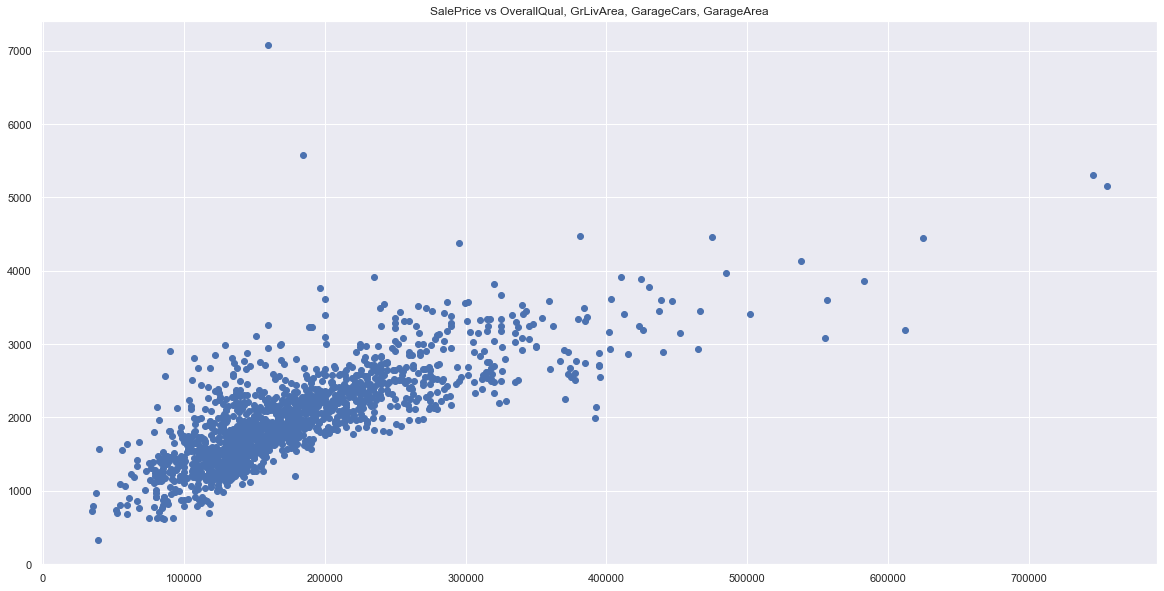

In [301]:
plt.scatter(df.SalePrice,df.OverallQual + df.GrLivArea + df.GarageCars + df.GarageArea)
plt.title('SalePrice vs OverallQual, GrLivArea, GarageCars, GarageArea')

In [302]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import ensemble

# Splitting data into training set and score set

X_var = df[df5.columns[0:16]].values
y_var = df['SalePrice'].values


X = df.drop(columns = 'SalePrice')
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))




1168 1168
292 292


In [303]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
score

0.003424657534246575

In [304]:
# Using Linear Regression to predict prices
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [305]:
reg.score(X_test, y_test)

0.8562626187429592

In [306]:
# Using Gradient Boosting Regression to predict prices

clf = ensemble.GradientBoostingRegressor(n_estimators = 350, max_depth = 5, min_samples_split = 2, learning_rate = 0.1, loss ='ls')

clf.fit(X_train, y_train)



/Users/serikzhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(loss='ls', max_depth=5, n_estimators=350)

In [307]:
clf.score(X_test, y_test)

0.9074967020603031

In [308]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df.drop(columns = 'SalePrice')
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
score

0.02054794520547945

In [309]:
RF_model = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=13).fit(X_train,y_train)
RF_model


RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=13)

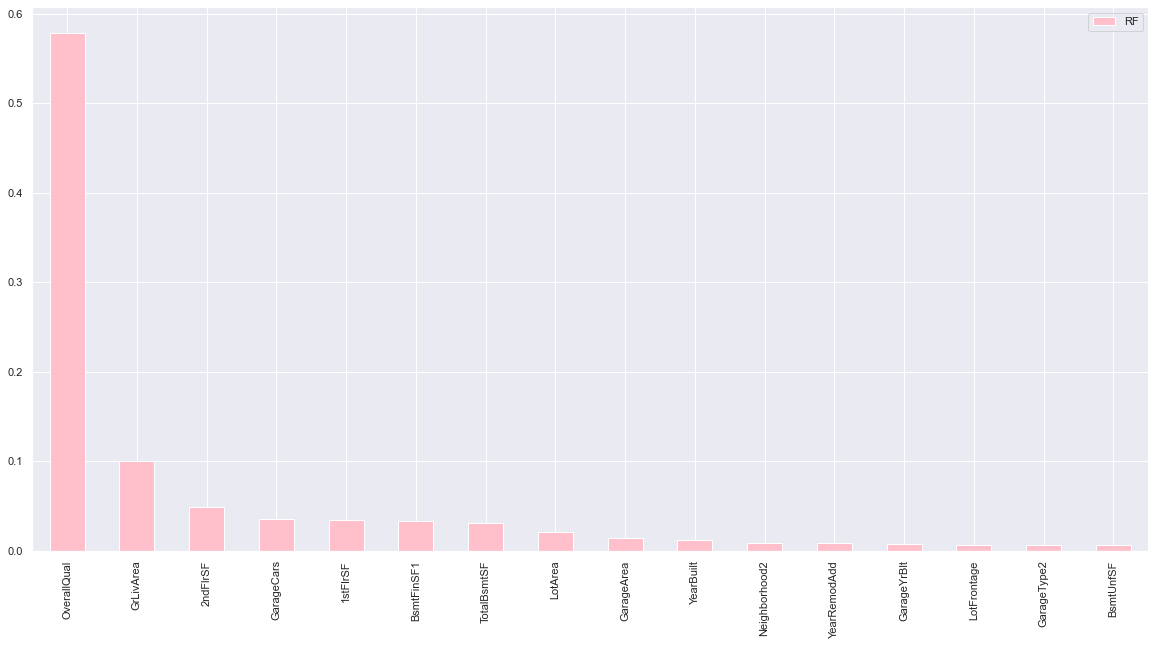

In [310]:
features = {}
for feature, importance in zip(X_train.columns, RF_model.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"RF":features})
importances.sort_values("RF", ascending = False, inplace=True)
importances[:16].plot.bar(color = 'pink');


In [328]:
# Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)
print('Ridge model', evs(y_test, ridge_yhat))

# Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)
print('Bayesian model', evs(y_test, bayesian_yhat))



Ridge model 0.8223657418222177
Bayesian model 0.8235327840423
